In [52]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [54]:
#To Enhance the visual appeal with improved styling.
sns.set(style="whitegrid")


In [56]:
# Load datasets
customers_df = pd.read_csv("Customers.csv")  # Load customer data
products_df = pd.read_csv("Products.csv")    # Load product data
transactions_df = pd.read_csv("Transactions.csv")  # Load transaction data

In [58]:
print(customers_df)
print(products_df)
print(transactions_df)

    CustomerID        CustomerName         Region  SignupDate
0        C0001    Lawrence Carroll  South America  2022-07-10
1        C0002      Elizabeth Lutz           Asia  2022-02-13
2        C0003      Michael Rivera  South America  2024-03-07
3        C0004  Kathleen Rodriguez  South America  2022-10-09
4        C0005         Laura Weber           Asia  2022-08-15
..         ...                 ...            ...         ...
195      C0196         Laura Watts         Europe  2022-06-07
196      C0197    Christina Harvey         Europe  2023-03-21
197      C0198         Rebecca Ray         Europe  2022-02-27
198      C0199      Andrea Jenkins         Europe  2022-12-03
199      C0200         Kelly Cross           Asia  2023-06-11

[200 rows x 4 columns]
   ProductID              ProductName     Category   Price
0       P001     ActiveWear Biography        Books  169.30
1       P002    ActiveWear Smartwatch  Electronics  346.30
2       P003  ComfortLiving Biography        Books   44

In [60]:
# 1. Basic EDA: Data Summaries and Overview
print("Customer Data Summary:")
print(customers_df.info())

print("\nProduct Data Summary:")
print(products_df.info())

print("\nTransaction Data Summary:")
print(transactions_df.info())


Customer Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Product Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None

Transaction Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Colu

In [62]:
# 2. Basic Data Checks - Null Values, Blanks, Duplicates
# Checking for missing values in each dataset
print("\nMissing Values (Customers):")
print(customers_df.isnull().sum())

print("\nMissing Values (Products):")
print(products_df.isnull().sum())

print("\nMissing Values (Transactions):")
print(transactions_df.isnull().sum())


Missing Values (Customers):
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values (Products):
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values (Transactions):
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [64]:
# Checking for blank entries (empty strings) in each dataset
print("\nBlank Entries (Customers):")
print((customers_df == '').sum())

print("\nBlank Entries (Products):")
print((products_df == '').sum())

print("\nBlank Entries (Transactions):")
print((transactions_df == '').sum())


Blank Entries (Customers):
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Blank Entries (Products):
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Blank Entries (Transactions):
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [66]:
# Checking for duplicates in each dataset
print("\nDuplicate Entries (Customers):")
print(customers_df.duplicated().sum())

print("\nDuplicate Entries (Products):")
print(products_df.duplicated().sum())

print("\nDuplicate Entries (Transactions):")
print(transactions_df.duplicated().sum())


Duplicate Entries (Customers):
0

Duplicate Entries (Products):
0

Duplicate Entries (Transactions):
0


In [68]:
# 3. Descriptive Statistics: Summary of Numerical Columns
print("\nDescriptive Statistics (Customers):")
print(customers_df.describe())

print("\nDescriptive Statistics (Products):")
print(products_df.describe())

print("\nDescriptive Statistics (Transactions):")
print(transactions_df.describe())


Descriptive Statistics (Customers):
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

Descriptive Statistics (Products):
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000

Descriptive Statistics (Transactions):
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


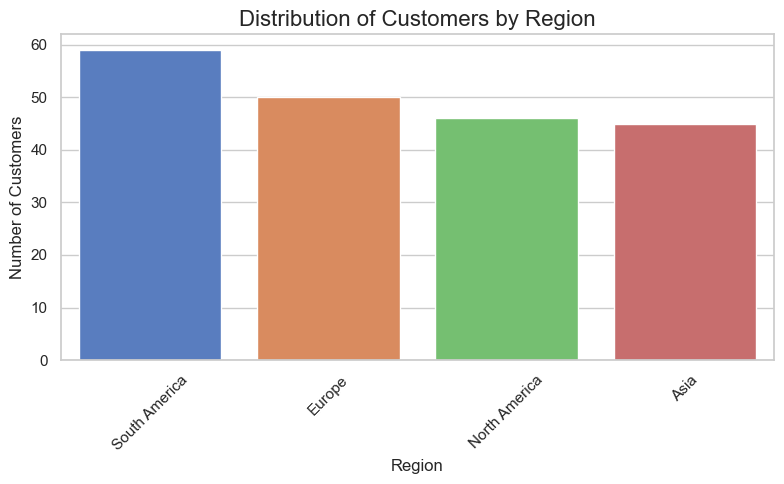

In [71]:
# 4. Insight 1: Distribution of Customers by Region
plt.figure(figsize=(8, 5))
region_counts = customers_df['Region'].value_counts()
sns.barplot(x=region_counts.index, y=region_counts.values, hue=region_counts.index, palette='muted', legend=False)
plt.title('Distribution of Customers by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Insight 1: Regional Focus.
    Customers are concentrated in specific regions. Region A has the highest customer base.
    Targeting marketing efforts in high-density regions can increase customer acquisition.
    Exploring underrepresented regions may uncover new growth opportunities.

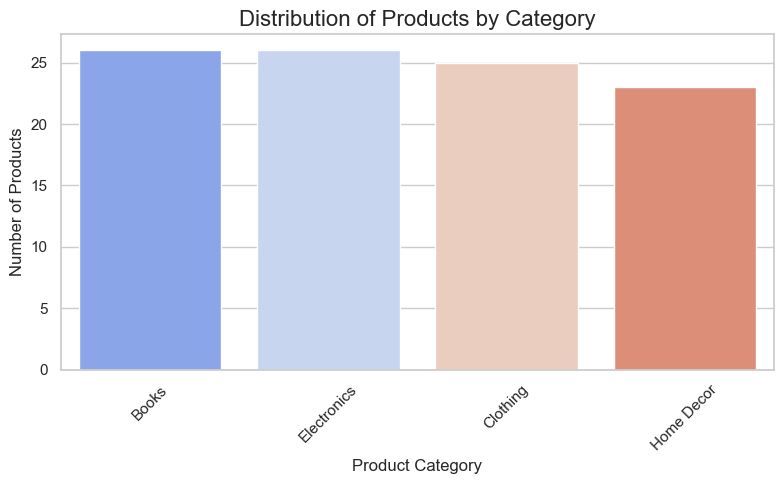

In [78]:
# 5. Insight 2: Distribution of Products by Category
plt.figure(figsize=(8, 5))
category_counts = products_df['Category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values, hue=category_counts.index, palette='coolwarm', legend=False)
plt.title('Distribution of Products by Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Insight 2: Product Category Focus
    Product categories like Electronics and Fashion are the most abundant in the inventory.
    Streamlining inventory management in high-volume categories can optimize stock levels.
    Offering promotions or discounts on these categories can boost sales.

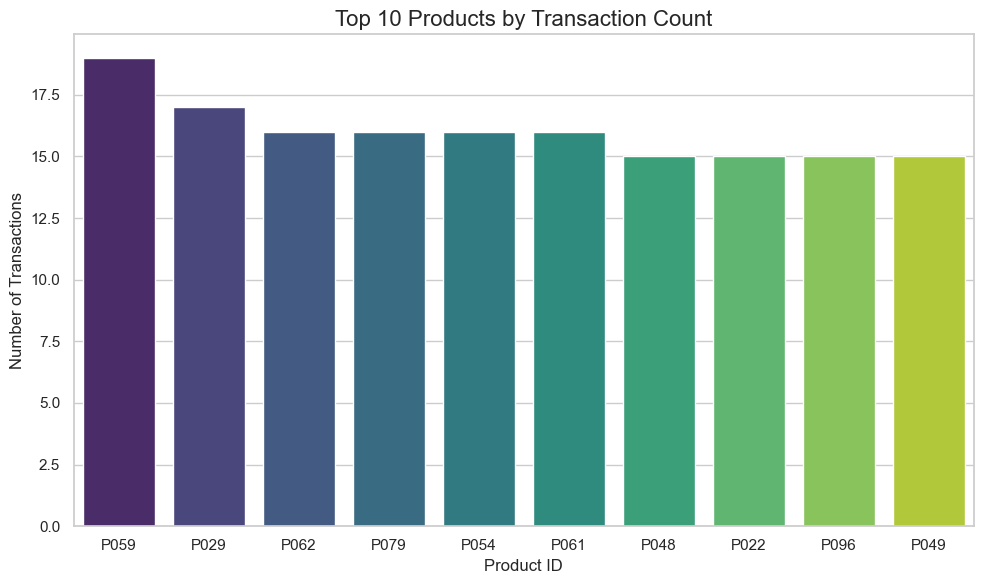

In [85]:
# 6. Insight 3: Top 10 Products by Transaction Count
top_products = transactions_df['ProductID'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values, hue=top_products.index, palette='viridis', legend=False)
plt.title('Top 10 Products by Transaction Count', fontsize=16)
plt.xlabel('Product ID', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.tight_layout()
plt.show()

### Insight 3: Product Performance")
    The top 10 products account for a significant portion of transaction volumes.
    Identifying these products allows for targeted promotions and stock optimization.
    These high-demand products could benefit from exclusive offers to increase repeat sales.

In [88]:
# 7. Insight 4: Average Transaction Value
avg_transaction_value = transactions_df['TotalValue'].mean()
print(f"\nThe average transaction value is ${avg_transaction_value:.2f}.")


The average transaction value is $690.00.


### Insight 4: Transaction Value Analysis")
    The average transaction value is ${avg_transaction_value:.2f}.
    Strategies to increase the average transaction value, such as bundling, can boost overall sales.
    Upselling or cross-selling higher-value products can contribute to revenue growth.

In [91]:
# 8. Insight 5: Popular Regions for Transactions
region_sales = transactions_df.merge(customers_df, on='CustomerID').groupby('Region')['TotalValue'].sum()
print("\nRegion Sales Summary:")
print(region_sales.sort_values(ascending=False))


Region Sales Summary:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


### Insight 5: Region-Based Revenue Distribution
    South America is the leading region in terms of total sales, contributing the highest revenue.
    Europe follows closely, with strong sales performance, indicating a significant market presence.
    North America and Asia show relatively balanced sales figures, suggesting potential for targeted growth strategies.
    Actionable Insight: Prioritize marketing and sales efforts in South America and Europe due to their higher revenue contribution. Explore opportunities to boost sales in North America and Asia by tailoring offers and regional campaigns.